In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
bds1 = pd.read_csv('Bankchurn.csv')

In [10]:
bds1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
bds1.drop('RowNumber', axis=1, inplace=True)

In [12]:
bds1.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
bds1.drop('CustomerId', axis=1, inplace=True)

In [14]:
bds1.tail()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [15]:
bds1.dtypes

Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [16]:
bds1.drop('Surname', axis=1, inplace=True)

In [18]:
bds1['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Let us apply label encoding

In [21]:
bds1 = pd.get_dummies(data=bds1, columns=['Geography'], prefix = 'Country')

Sample labelling

In [22]:
bds1['Gender'].replace({'Female': 1, 'Male': 0}, inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_5596\3143677707.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bds1['Gender'].replace({'Female': 1, 'Male': 0}, inplace = True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_5596\3143677707.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bds1['Gender'

In [23]:
bds1.dtypes

CreditScore          int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
Country_France        bool
Country_Germany       bool
Country_Spain         bool
dtype: object

Let's change the bools!

In [26]:
bools_cols = bds1.select_dtypes(include = 'bool').columns

In [29]:
for col in bools_cols:
    bds1[col] = bds1[col].astype(int)

Done with data preprocessing, wait! Let's check it one more time.

In [30]:
bds1.dtypes

CreditScore          int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
Country_France       int64
Country_Germany      int64
Country_Spain        int64
dtype: object

=== COMPLETE DATA DIAGNOSTICS ===
Exited column info:
Unique values: [1 0]
Data type: int64
Value counts:
Exited
0    7963
1    2037
Name: count, dtype: int64

Tenure column info:
Data type: int64
Value range: 0 to 10
Sample values: [2, 1, 8, 1, 2]

=== FILTERING TEST ===
Not churned samples: 7963
Churned samples: 2037
Not churned tenure sample: [1, 1, 2]
Churned tenure sample: [2, 8, 8]

=== BASIC PLOT TEST ===


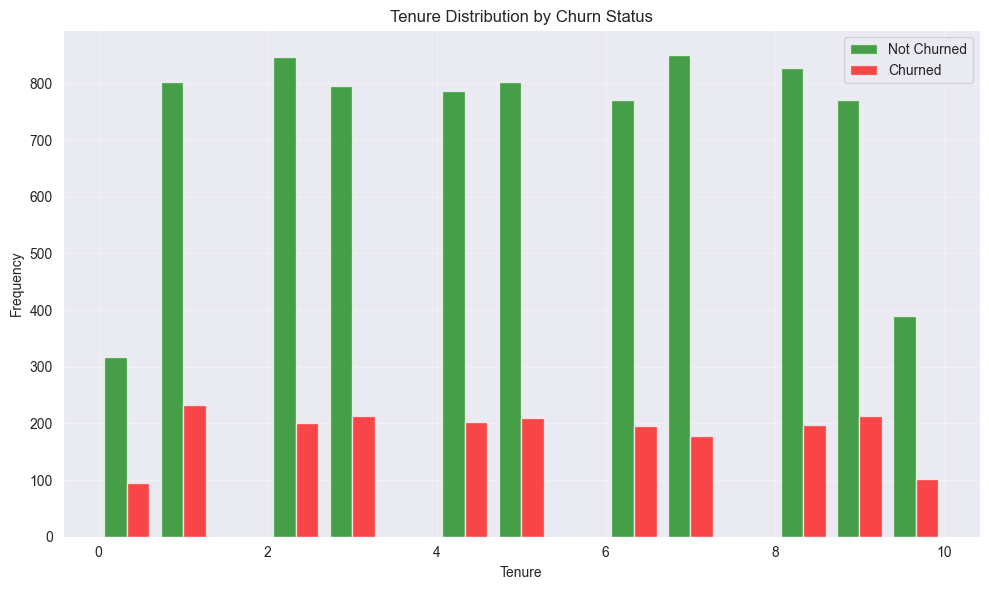

✅ Plot should be displayed


In [55]:
# 1. First, let's check EVERYTHING about your data
print("=== COMPLETE DATA DIAGNOSTICS ===")

# Check the Exited column
print("Exited column info:")
print(f"Unique values: {bds1['Exited'].unique()}")
print(f"Data type: {bds1['Exited'].dtype}")
print(f"Value counts:\n{bds1['Exited'].value_counts()}")

# Check the Tenure column
print("\nTenure column info:")
print(f"Data type: {bds1['Tenure'].dtype}")
print(f"Value range: {bds1['Tenure'].min()} to {bds1['Tenure'].max()}")
print(f"Sample values: {bds1['Tenure'].head(5).tolist()}")

# 2. Test the filtering
print("\n=== FILTERING TEST ===")
tenure_exit_no = bds1[bds1.Exited == 0]['Tenure']
tenure_exit_yes = bds1[bds1.Exited == 1]['Tenure']

print(f"Not churned samples: {len(tenure_exit_no)}")
print(f"Churned samples: {len(tenure_exit_yes)}")

# Check if we actually have data
print(f"Not churned tenure sample: {tenure_exit_no.head(3).tolist()}")
print(f"Churned tenure sample: {tenure_exit_yes.head(3).tolist()}")

# 3. Test basic plotting
print("\n=== BASIC PLOT TEST ===")
if len(tenure_exit_no) > 0 and len(tenure_exit_yes) > 0:
    # Try a simple plot first
    plt.figure(figsize=(10, 6))

    # Method 1: Your original approach
    plt.hist([tenure_exit_no, tenure_exit_yes],
             color=['green', 'red'],
             label=['Not Churned', 'Churned'],
             alpha=0.7,
             bins=15)

    plt.xlabel('Tenure')
    plt.ylabel('Frequency')
    plt.title('Tenure Distribution by Churn Status')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Force the plot to show
    plt.tight_layout()
    plt.show()
    print("✅ Plot should be displayed")
else:
    print("❌ No data to plot!")

In [63]:
#Separate the data

x = bds1.drop('Exited', axis = 'columns')

y = bds1['Exited']

In [64]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [65]:
num_features = x_train.shape[1]
print(f"Correct number of features: {num_features}")

Correct number of features: 12


In [66]:
#Building the neural network

model = keras.Sequential([
    keras.layers.Dense(26, input_shape = (12,), activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),

])


C:\Users\DELL\PycharmProjects\PythonProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']),

model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7720 - loss: 0.5192
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7965 - loss: 0.4716
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8009 - loss: 0.4596
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8048 - loss: 0.4515
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8050 - loss: 0.4439
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8085 - loss: 0.4369
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8127 - loss: 0.4311
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8151 - loss: 0.4258
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8185 - loss: 0.4208
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8209 - loss: 0.4164
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8229 - loss: 0.4119
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [68]:
model.evaluate(x_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8645 - loss: 0.3383


[0.3383370637893677, 0.8644999861717224]

In [73]:
yp = model.predict(x_test)
yp[:10]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.03096681],
       [0.02790751],
       [0.14840275],
       [0.10536265],
       [0.04941715],
       [0.01379156],
       [0.11021823],
       [0.06824089],
       [0.31196138],
       [0.54813766]], dtype=float32)

In [71]:
y_pred = []

for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [72]:
y_test[:10]

6252    0
4684    0
1731    0
4742    0
4521    0
6340    0
576     0
5202    1
6363    0
439     0
Name: Exited, dtype: int64

In [74]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.73      0.49      0.59       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



Text(95.72222222222221, 0.5, 'Truth')

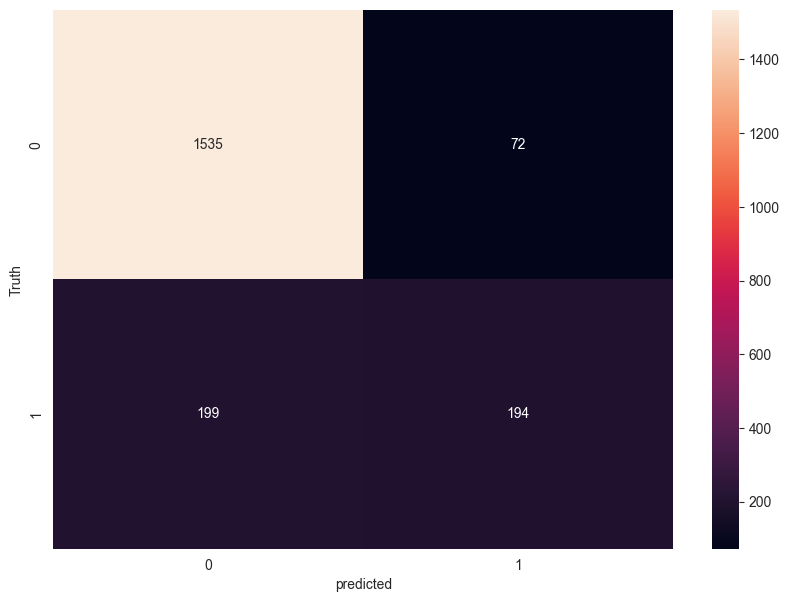

In [75]:
import seaborn as sns

cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)

plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('Truth')